In [1]:
import numpy as np
import xarray as xr
import json
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import metpy.calc as mcalc
from metpy.units import units
import metpy
import pygrib
import importlib

In [2]:
import sys
sys.path.append("/home/takato/Git/jma_radar/")
import jma_gsm
import custom_colormap
cmap=custom_colormap.get_jmacmap2()

In [3]:
gsm=jma_gsm.GSMGlobal()

In [4]:
ds_sfc=gsm.read_sfc("/home/takato/Data/JMA/GSM/gl/Z__C_RJTD_20210815000000_GSM_GPV_Rgl_FD0012_grib2.bin",product_type="FCT",timestep=[0])

In [18]:
ds_sfc=gsm.read_sfc("/home/takato/Data/JMA/GSM/gl/Z__C_RJTD_20210815000000_GSM_GPV_Rgl_FD0100_grib2.bin",product_type="FCT",timestep=[0])

In [19]:
ds_sfc

<xarray.Dataset>
Dimensions:             (lat: 141, lon: 301)
Coordinates:
  * lat                 (lat) float64 70.0 69.5 69.0 68.5 ... 1.5 1.0 0.5 0.0
  * lon                 (lon) float64 60.0 60.5 61.0 61.5 ... 209.0 209.5 210.0
Data variables:
    pmsl                (lat, lon) float64 1.004e+05 1.004e+05 ... 1.013e+05
    ps                  (lat, lon) float64 9.993e+04 1.002e+05 ... 1.013e+05
    u10                 (lat, lon) float64 0.4138 1.148 2.289 ... -7.149 -7.102
    v10                 (lat, lon) float64 3.568 3.537 3.334 ... 1.209 1.193
    T2m                 (lat, lon) float64 280.1 280.8 281.1 ... 299.7 299.6
    rh2m                (lat, lon) float64 91.09 94.12 92.72 ... 75.62 76.0
    Low_cloud_cover     (lat, lon) float64 0.0 0.0 0.0 ... 0.7812 21.68 17.92
    Medium_cloud_cover  (lat, lon) float64 0.0 0.0 0.0 ... 0.04883 3.662 2.881
    High_cloud_cover    (lat, lon) float64 14.26 9.473 9.619 ... 0.0 0.0 0.0
    Total_cloud_cover   (lat, lon) float64 14.26 9.473 9.619 ... 21.88 18.07
    precip              (lat, lon) float64 0.5 0.5625 0.6875 ... 0.0 0.0 0.0

In [5]:
dslev=gsm.read_plev("/home/takato/Data/JMA/GSM/gl/Z__C_RJTD_20210801000000_GSM_GPV_Rgl_FD0000_grib2.bin",timestep=[0])

In [6]:
jma_gsm.GSMGlobal.add_dew_point_depreession_equ_potential_T(dslev)
jma_gsm.GSMGlobal.add_wind_vorticity_omega(dslev)

/home/takato/miniconda3/envs/ml39/lib/python3.9/site-packages/metpy/calc/thermo.py:1384: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/home/takato/miniconda3/envs/ml39/lib/python3.9/site-packages/metpy/calc/thermo.py:1385: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


In [7]:
wmap=jma_gsm.WheatherMap()
wmap.figsize=(9,6)

(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': '500hPa'}>)

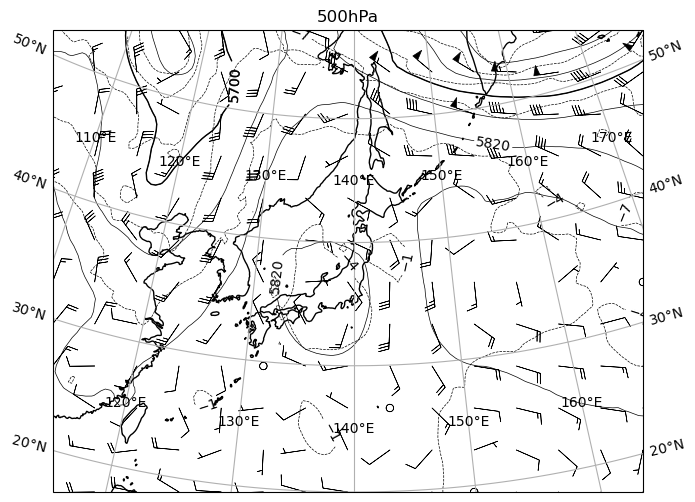

In [8]:
wmap.plot_500hPa_map(dslev)

/home/takato/miniconda3/envs/ml39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': '850hPa'}>)

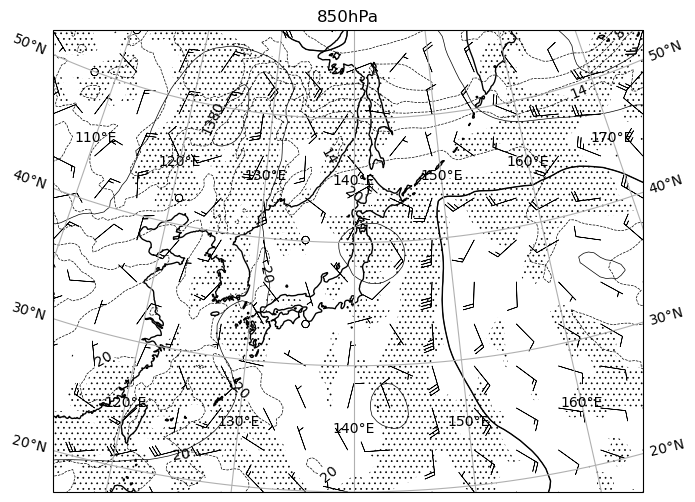

In [9]:
wmap.plot_850hPa_map(dslev)

(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': '700hPa'}>)

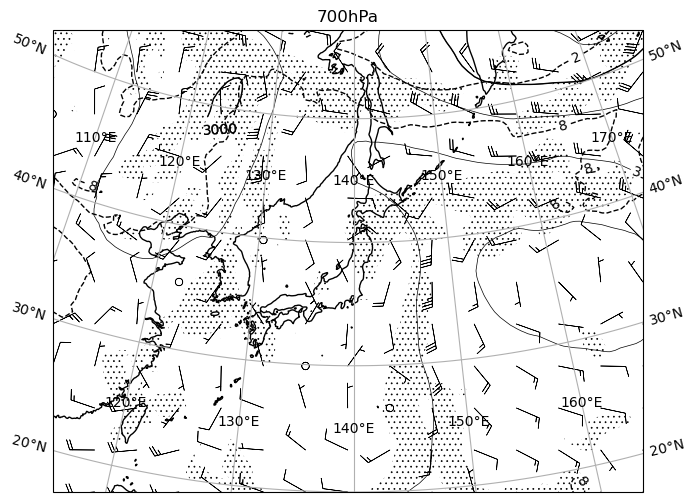

In [10]:
wmap.plot_700hPa_map(dslev)

(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': '300hPa'}>)

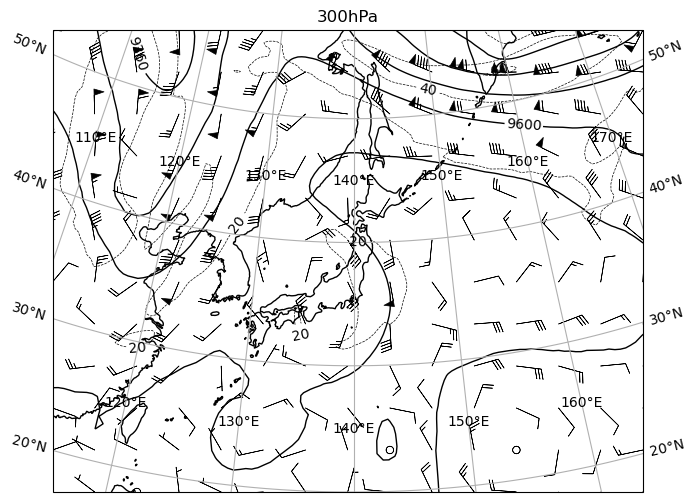

In [11]:
wmap.plot_300hPa_map(dslev)

(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': '500hPa height_vorticity'}>)

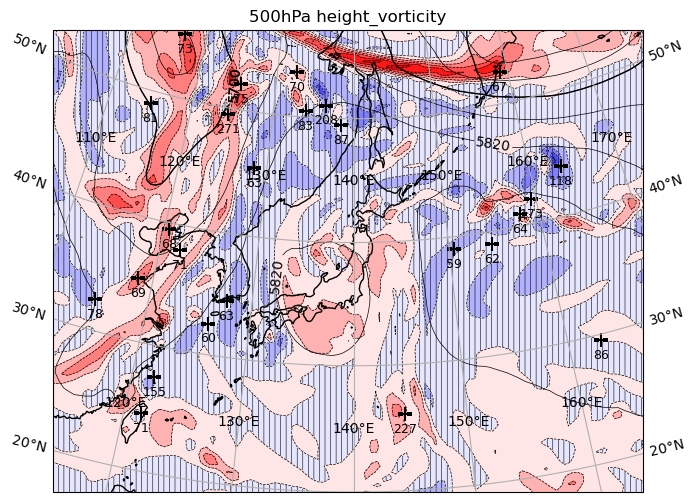

In [12]:
plt.rcParams['hatch.linewidth'] = 0.4
wmap.plot_500hPa_vo_map(dslev)

/home/takato/miniconda3/envs/ml39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': 'surface precip_pressure_wind'}>)

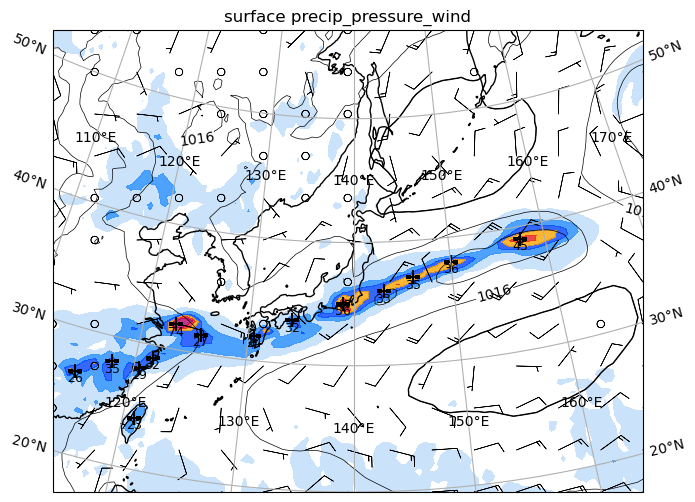

In [13]:
wmap.plot_surface_ps_wind_precip(ds_sfc,cmap=cmap)

/home/takato/miniconda3/envs/ml39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': '500hPa T 700hPa dew point depreesion'}>)

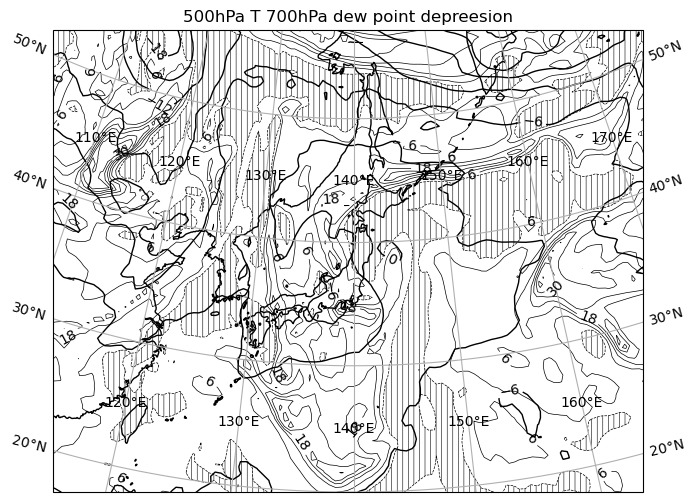

In [14]:
wmap.plot_500hPa_T_700hPa_dew_point_depression(dslev)

(<Figure size 900x600 with 1 Axes>,
 <GeoAxesSubplot: title={'center': '850hPa wind equ potential temperature'}>)

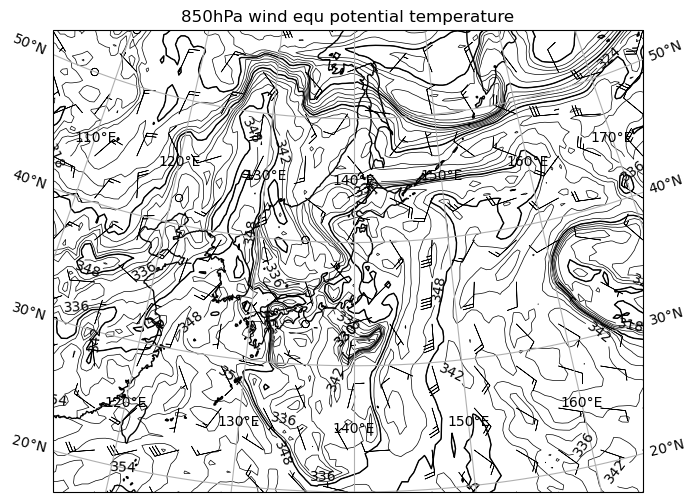

In [15]:
wmap.plot_850hPa_wind_equ_potential_temperature(dslev)